In [1]:
import numpy as np
import pandas as pd 
import mplfinance as mpf

In [2]:
df = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/TehranMarket/Symbol/AhromH.csv", index_col = "Date",
                 parse_dates = True,
                 na_values=['nan'])
#df = df.drop(df.index[-1])
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,10000,10000,10000,10000,490000000
2020-01-02,10000,10016,9999,10014,1178120
2020-01-03,10015,10015,10000,10002,236166
2020-01-04,10002,10060,10000,10060,576178
2020-01-05,10010,10048,10001,10028,694329
...,...,...,...,...,...
2024-11-05,18080,18090,18010,18050,4031061
2024-11-06,18150,18300,17990,18000,15040076
2024-11-07,18000,18150,17900,18130,10989450


In [3]:
def calculate_ATR(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift())
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift())
    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
    
    # Calculate Average True Range (ATR)
    data['ATR'] = data['TrueRange'].rolling(period).mean()
    
    # Clean up temporary columns
    data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1, inplace=True)
    
    return data
dfATR = calculate_ATR(df, period=14)
dfATR.tail()

,Open,High,Low,Close,Volume,ATR
Date,,,,,,
2024-11-05,18080,18090,18010,18050,4031061,214.285714
2024-11-06,18150,18300,17990,18000,15040076,228.571429
2024-11-07,18000,18150,17900,18130,10989450,235.000000
2024-11-08,18120,18150,18020,18060,6113283,210.714286
2024-11-09,18060,18070,18010,18050,1934307,200.714286


C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


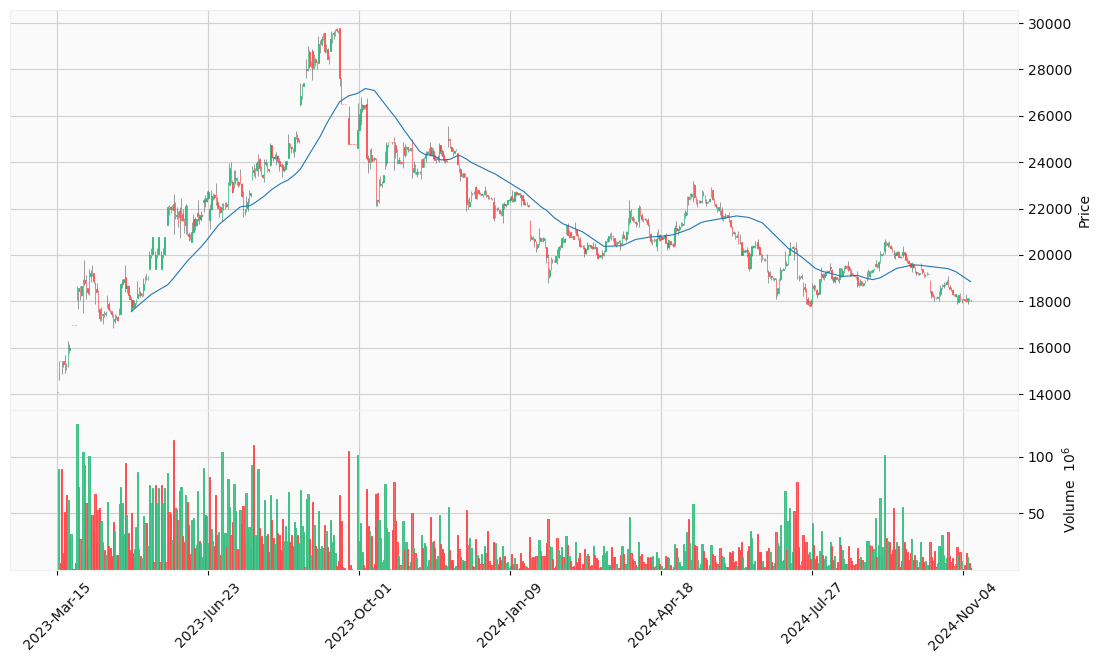

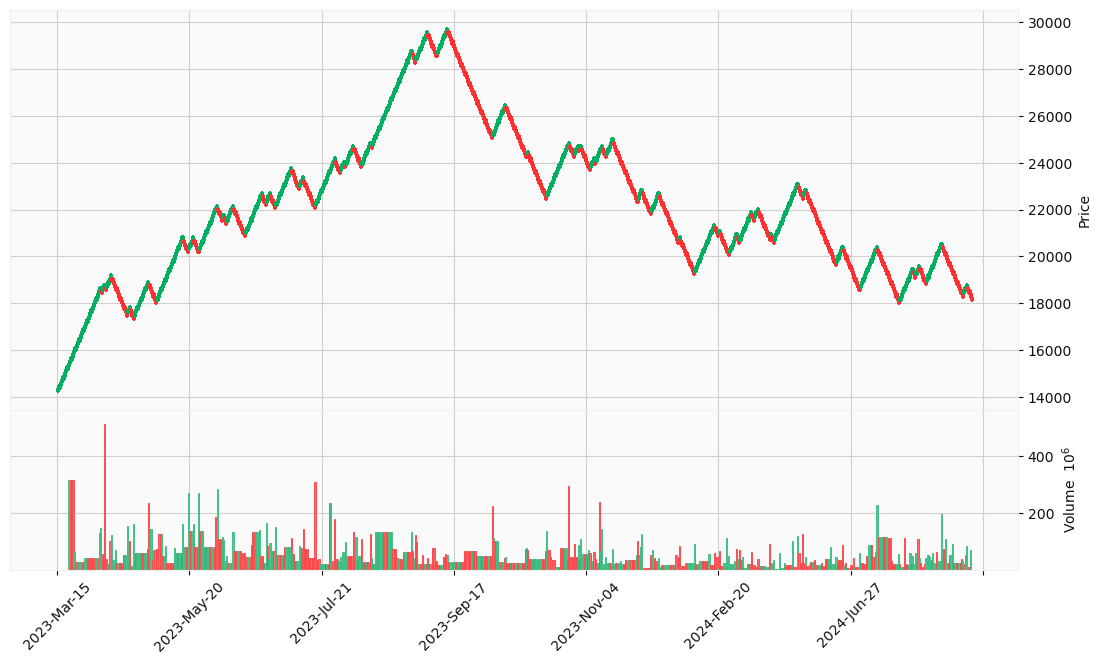

In [12]:
Ndf = df.loc['2023-03-15':]
mpf.plot(Ndf,type="candle", volume = True, style = 'yahoo',mav=50, figsize=(14,8))
mpf.plot(Ndf,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =135) , 
        figsize=(14,8))

In [5]:

def calculate_RSI(data, period=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    data['RSI'] = rsi
    
    return data

In [6]:
Adf = calculate_RSI(df, period=14)

In [7]:
Adf = calculate_ATR(df, period=14)

In [8]:
Adf['MAV100'] = Adf['Volume'].rolling(window=100).mean()
Adf = Adf.dropna()

In [9]:
forecast_out = int(1)
Adf['PredictionClose'] = Adf['Close'].shift(-forecast_out)
Adf['PredictionHigh'] = Adf['High'].shift(-forecast_out)
Adf['PredictionLow'] = Adf['Low'].shift(-forecast_out)
Adf

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_9612\4043434762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adf['PredictionClose'] = Adf['Close'].shift(-forecast_out)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_9612\4043434762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adf['PredictionHigh'] = Adf['High'].shift(-forecast_out)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_9612\4043434762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Open,High,Low,Close,Volume,ATR,RSI,MAV100,PredictionClose,PredictionHigh,PredictionLow
Date,,,,,,,,,,,
2020-04-09,9210,9220,9160,9160,539577,87.857143,32.258065,5397032.91,9170.0,9300.0,9170.0
2020-04-10,9190,9300,9170,9170,290870,94.285714,29.213483,499941.61,9200.0,9270.0,9180.0
2020-04-11,9270,9270,9180,9200,34622,90.714286,34.523810,488506.63,9180.0,9200.0,9160.0
2020-04-12,9200,9200,9160,9180,213778,92.142857,34.117647,488282.75,9190.0,9200.0,9160.0
2020-04-13,9180,9200,9160,9190,50445,92.857143,36.144578,483025.42,9150.0,9200.0,9150.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-05,18080,18090,18010,18050,4031061,214.285714,29.559748,16128368.49,18000.0,18300.0,17990.0
2024-11-06,18150,18300,17990,18000,15040076,228.571429,26.875000,16180091.26,18130.0,18150.0,17900.0
2024-11-07,18000,18150,17900,18130,10989450,235.000000,29.090909,16163022.41,18060.0,18150.0,18020.0


In [10]:
Adf.to_csv('AhromRH.csv', index=True)